## 数据读取与数据分析

使用Pandas库完成数据读取操作，并对赛题数据进行分析构成

- 学习使用Pandas读取赛题数据
- 分析赛题数据的分布规律


### 数据读取

赛题数据虽然是文本数据，每个新闻是不定长的，但任然使用csv格式进行存储。因此可以直接用Pandas完成数据读取的操作

In [1]:
import pandas as pd
# github无法上传大数据文件，读取本地csv文件
%cd /Users/sampras/Desktop/samlpe_data_base/新闻文本分类/
df_train = pd.read_csv('train_set.csv', sep='\t', nrows=100)
df_train.head()   

/Users/sampras/Desktop/samlpe_data_base/新闻文本分类


,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


这里的read_csv由三部分构成：

- 读取的文件路径，这里需要根据改成你本地的路径，可以使用相对路径或绝对路径；

- 分隔符sep，为每列分割的字符，设置为`\t`即可；

- 读取行数nrows，为此次读取文件的函数，是数值类型（由于数据集比较大，建议先设置为100）；

`lable`为新闻的类别，`text`为新闻的字符

### 数据分析

此步骤我们读取了所有的训练集数据，在此我们通过数据分析希望得出以下结论：

- 赛题数据中，新闻文本的长度是多少？
- 赛题数据的类别分布是怎么样的，哪些类别比较多？
- 赛题数据中，字符分布是怎么样的？


#### 句子长度分析

在赛题数据中每行句子的字符使用空格进行隔开，所以可以直接统计单词的个数来得到每个句子的长度。统计并如下：


In [2]:
df_train = pd.read_csv('train_set.csv', sep='\t')
%pylab inline
df_train['text_len'] = df_train['text'].apply(lambda x: len(x.split(' ')))
print(df_train['text_len'].describe())   

Populating the interactive namespace from numpy and matplotlib
count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


对新闻句子的统计可以得出，本次赛题给定的文本比较长，每个句子平均由907个字符构成，最短的句子长度为2，最长的句子长度为57921。

Text(0.5, 1.0, 'Histogram of char count')

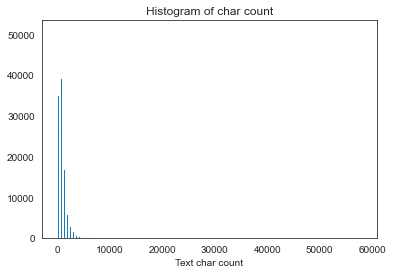

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')  # 黑色主题需要设置白底显示
# 绘制句子长度分布直方图
_ = plt.hist(df_train['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title('Histogram of char count')

#### 新闻类别分布

对数据集的类别进行分布统计，具体统计每类新闻的样本个数

Text(0.5, 0, 'categropy')

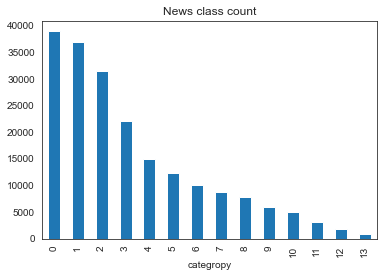

In [20]:
df_train['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel('categropy')

在数据集中标签的对应的关系如下：{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}

从统计结果可以看出，赛题的数据集类别分布存在较为不均匀的情况。在训练集中科技类新闻最多，其次是股票类新闻，最少的新闻是星座新闻。

#### 字符分布统计

首先可以将训练集中所有的句子进行拼接进而划分为字符，并统计每个字符的个数

In [3]:
from collections import Counter
all_lines = ' '.join(list(df_train['text']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d: d[1], reverse=True)

print("训练集出现的字符数：", len(word_count))
print("出现次数最多的字符：", word_count[0])
print("出现次数最少的字符：", word_count[-1])
# 从统计结果中可以看出，在训练集中总共包括6869个字，其中编号3750的字出现的次数最多，编号3133的字出现的次数最少

训练集出现的字符数： 6869
出现次数最多的字符： ('3750', 7482224)
出现次数最少的字符： ('3133', 1)


In [5]:
# 这里还可以根据字在每个句子的出现情况，反推出标点符号。下面代码统计了不同字符在句子中出现的次数，其中字符3750，字符900和字符648在20w新闻的覆盖率接近99%，很有可能是标点符号
df_train['text_unique'] = df_train['text'].apply(
    lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(df_train['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d: int(d[1]), reverse=True)



('3750', 197997)
('900', 197653)
('648', 191975)


###  数据分析结论